### Predicting Whether an NBA Career Will Last 5+ Years

`nba_logreg.csv`

### Form a training and testing dataset to be used to predict whether an NBA player's career will last for 5 years or longer.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np
import time
from math import exp

In [ ]:
# import the complete dataset and learn about it
nba = pd.read_csv(r"/nba_logreg.csv")
#nba.head()
#nba.columns
nba.info()
nba.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

(1340, 21)

In [ ]:
# get the training set, the testing set, and the validation set
splits = np.random.choice(a = 3, size = nba.shape[0], p = [0.7, 0.15, 0.15])
nba_train = nba.iloc[np.where(splits == 0)[0], :]
nba_val = nba.iloc[np.where(splits == 1)[0], :]
nba_test = nba.iloc[np.where(splits == 2)[0], :]

# export csv files
nba_train.to_csv(r"/nba_train.csv")
nba_val.to_csv(r"/nba_validate.csv")
nba_test.to_csv(r"/nba_test.csv")

### Use 10-fold Cross-Validation to identify the best threshold for predicting that predicts whether they will last 5 years or not given their FG% and Games Played (GP).

In [ ]:
# create logistic regression from training set
Xtrain = nba_train[['GP', 'FG%']]
ytrain = nba_train[['TARGET_5Yrs']]
Xtrain = sm.add_constant(Xtrain)
log_reg = sm.Logit(ytrain, Xtrain).fit()
#log_reg.summary()

# make predictions on validation set using logistic regression from training set
Xval = nba_val[['GP', 'FG%']]
yval = nba_val[['TARGET_5Yrs']]
Xval = sm.add_constant(Xval)
val_preds = log_reg.predict(Xval)

thresholds = np.linspace(0, 1, 10)

nba_train_val = pd.concat([nba_train, nba_val])
nba_train_val.reset_index(inplace=True, drop=True)

folds = np.random.choice(a = 10, size = nba_train_val.shape[0])

acc_list = []

for thresh in thresholds:
    bin_pred_list = []
    yval_list = []
    for i in range(10):
        val = nba_train_val.iloc[np.where(folds == i)[0],:]
        train = nba_train_val.iloc[np.where(folds != i)[0],:]

        Xtrain = train[['GP', 'FG%']]
        ytrain = train[['TARGET_5Yrs']]
        Xtrain = sm.add_constant(Xtrain)
        log_reg = sm.Logit(ytrain, Xtrain).fit()

        Xval = val[['GP', 'FG%']]
        yval = val[['TARGET_5Yrs']]
        Xval = sm.add_constant(Xval, has_constant='add')
        val_preds = log_reg.predict(Xval.apply(pd.to_numeric))
    
        binary_preds = np.where(val_preds >= thresh, 1, 0)
        bin_pred_list.extend(binary_preds)
        yval_list.extend(yval['TARGET_5Yrs'].tolist())
    acc_list.append(accuracy_score(yval_list, bin_pred_list))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.574470
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566931
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574989
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572187
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570846
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572517
  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572187
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570846
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572517
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578808
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566931
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574989
  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.569757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572517
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578808
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566931
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574989
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572187
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570846
  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.578808
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566931
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574989
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572187
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570846
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572517
  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.566931
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574989
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578053
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572187
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570846
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569757
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572517
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578808
  

In [ ]:
Xtest = nba_test[['GP', 'FG%']]
Xtest = pd.get_dummies(data=Xtest, drop_first=True)
ytest = nba_test[['TARGET_5Yrs']]
Xtest = sm.add_constant(Xtest)
preds = log_reg.predict(Xtest)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


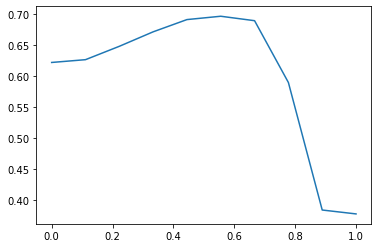

In [ ]:
# Plot the thresholds
plt.plot(thresholds, acc_list)

In [ ]:
# Find how accurate the model was

best_threshold = thresholds[np.argmax(acc_list)]
print(best_threshold)

binary_preds = np.where(preds >= thresholds[np.argmax(acc_list)], 1, 0)

accuracy_score(ytest, binary_preds)

0.5555555555555556


0.6576576576576577